# Chapter 5 - Material properties

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

## The dihedral angle 

An equation for dihedral angle $\Theta$ is

$$
\begin{equation}
  \label{eq:dihedral-angle}
  \cos\frac{\dihed}{2} = \frac{\sfce\solsol}{2\sfce\liqsol}.
\end{equation}
$$

In [2]:
Theta = 30.0  # the dihedral angle

Interfaces oriented according to angles $\Theta_k$ and interfacial tensions $\sigma_k$, as shown in Figure 5.2a.

We can represent the upper liquid--solid interface $y(x)$ as a circular arc-segment with its centre at $(0,y_0)$ and a radius $r_1$,

$$
\begin{align}
\label{eq:pore-zero-curvature_y}
y(x) &= y_0 \pm \sqrt{r_1^2-x^2},\\
\label{eq:pore-zero-curvature_yp}
y'(x) &= \mp\frac{x}{\left({r_1^2-x^2}\right)^{1/2}},
\end{align}
$$

where the sign ($\pm$) is determined by whether the liquid--solid interfaces are concave ($\Theta<60^\circ$) or convex ($\Theta>60^\circ$). 

Values for $r_1$ and $y_0$ are obtained by matching the boundary conditions at the pore corners where the interfaces meet at the dihedral angle,

$$
\begin{align}
\label{eq:pore-zero-curvature-bcs-y_J}
y(x_\Lambda) &= x_\Lambda\tan(\pi/6)\equiv y_\Lambda,\\
\label{eq:pore-zero-curvature-bcs-y_Jp}
y'(x_\Lambda)&=\tan(\pi/6 - \dihed/2)\equiv y'_\Lambda.
\end{align}
$$

$x_\Lambda$ is the positive $x$-position at which the liquid--solid boundary terminates at the solid--solid boundary. Assuming a dihedral angle $\Theta \ne 60^\circ$ and using equations $\eqref{eq:pore-zero-curvature_yp}$ and
$\eqref{eq:pore-zero-curvature-bcs-y_Jp}$ we find that

$$
\begin{equation}
  \label{eq:circle-pore-radius}
  r_1 = \frac{x_\Lambda}{y'_\Lambda}\sqrt{1 + {y'_\Lambda}^2}.
\end{equation}
$$

Then, by geometry, $y_0 = y_\Lambda + \text{sgn}(y'_\Lambda)\sqrt{r_1^2 - x_\Lambda^2}$. These values and equation $\eqref{eq:pore-zero-curvature_y}$ are used to plot the upper interface in Figure 5.2b. The other two interfaces are
obtained by rotating the upper interface by $\pm120^\circ$ about the origin.

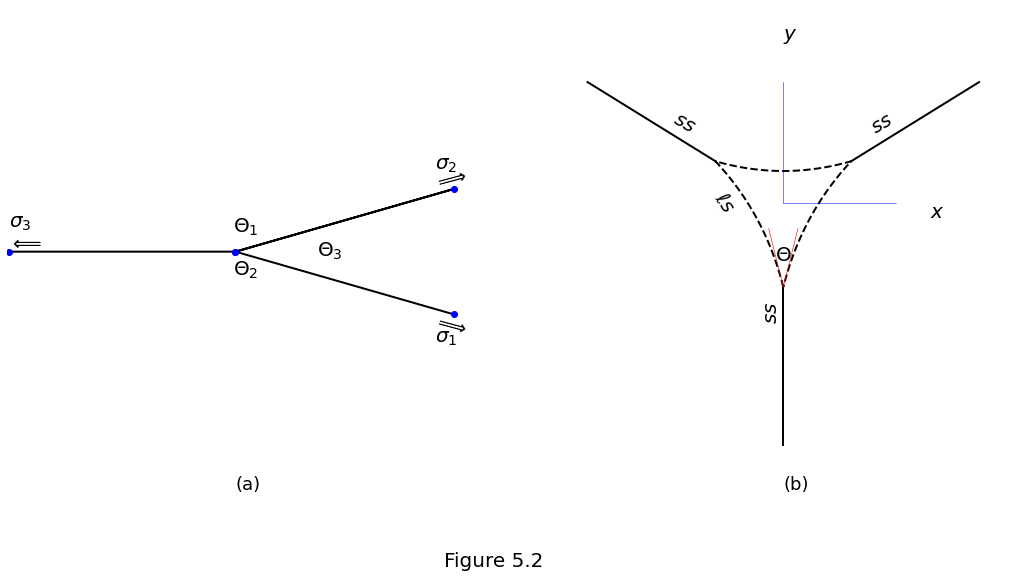

In [4]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(18.0, 9.0)

# Figure 5.2 a

theta_3_rad = Theta * np.pi / 180. / 2.0
thre5_rad = (5. + Theta) * np.pi / 180. / 2.0
thre10_rad = (12. + Theta) * np.pi / 180. / 2.0

factor = lambda t: 0.05 + (0.0 if t > 80. else 0.5*(80. - t)/80.)

ct = np.cos(theta_3_rad)
st = np.sin(theta_3_rad)
x = [-1.0, 0.0, ct, 0.0, ct]
y = [0.0, 0.0, st, 0.0, -st]

ax[0].plot(x, y, '-k', linewidth=2)
ax[0].plot(x, y, 'bo')
ax[0].set_xlim(-1.01, 1.01)
ax[0].set_ylim(-1.01, 1.01)

ax[0].annotate(r'$\Theta_1$', xy=[-0.01, 0.08], fontsize=20)
ax[0].annotate(r'$\Theta_2$', xy=[-0.01, -0.1], fontsize=20)
ax[0].annotate(r'$\Theta_3$', xy=[factor(Theta), -0.02], fontsize=20)

ax[0].text(np.cos(thre10_rad), -np.sin(thre10_rad), r'$\sigma_1$', 
           horizontalalignment='center', verticalalignment='center', fontsize=20)
ax[0].text(np.cos(thre5_rad), -np.sin(thre5_rad), r'$\Longrightarrow$', fontsize=20, rotation=-0.5*Theta, 
           horizontalalignment='center', verticalalignment='center')

ax[0].text(np.cos(thre10_rad), np.sin(thre10_rad), r'$\sigma_2$', fontsize=20, 
           horizontalalignment='center', verticalalignment='center')
ax[0].text(np.cos(thre5_rad), np.sin(thre5_rad), r'$\Longrightarrow$', fontsize=20, rotation=0.5*Theta, 
           horizontalalignment='center', verticalalignment='center')
ax[0].text(0.0, -1.0, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')

ax[0].annotate(r'$\sigma_3$', xy=(-1.0, 0.1), fontsize=20, rotation=0.0)
ax[0].annotate(r'$\Longleftarrow$', xy=(-1.0, 0.01), fontsize=20, rotation=0.0)

ax[0].set_axis_off()

# Figure 5.2 b
theta_rad = Theta * np.pi / 180.
beta = 120.*np.pi/180./2.
ysh = 0.2

xI = 0.3 
x = np.linspace(0.0, xI, 100)
y = 0.5 * xI * ((x**2/xI**2 - 1.)*np.tan(np.pi/6. - 0.5*theta_rad) + 2.0*np.tan(np.pi/6.))
X = np.zeros(x.shape[0] * 2 * 2).reshape(2, 2*x.shape[0])
X[0, :] = np.concatenate((-x[::-1], x), axis=0)
X[1, :] = np.concatenate((y[::-1], y), axis=0)
R = np.array(((np.cos(beta*2.), -np.sin(beta*2)), (np.sin(beta*2), np.cos(beta*2))))
RX = np.fliplr(np.dot(R, X))
RRX = np.fliplr(np.dot(np.linalg.inv(R), X))
x = np.concatenate((np.fliplr(RX)[0, :], X[0,:], np.fliplr(RRX)[0, :]), axis=0)
y = np.concatenate((np.fliplr(RX)[1, :], X[1,:], np.fliplr(RRX)[1, :]), axis=0)
ax[1].plot(x, y+ysh, '--k', linewidth=2)

cT = np.cos(beta) 
sT = np.sin(beta)
ss = np.array(((0.0, 0.0), (-1.0, np.amin(y))))
ax[1].plot(ss[0, :], ss[1, :]+ysh, '-k', linewidth=2)
ss = np.dot(np.linalg.inv(R), ss)
ax[1].plot(ss[0, :], ss[1, :]+ysh, '-k', linewidth=2)
ss = np.dot(np.linalg.inv(R), ss)
ax[1].plot(ss[0, :], ss[1, :]+ysh, '-k', linewidth=2)

ax[1].plot([0, 0.5], [ysh, ysh], '-b', linewidth=0.5)
ax[1].plot([0, 0], [ysh, 0.5+ysh], '-b', linewidth=0.5)
ax[1].annotate(r'$x$', xy=(0.65, ysh), fontsize=20, verticalalignment='top', horizontalalignment='left')
ax[1].annotate(r'$y$', xy=(0.0, 0.65+ysh), fontsize=20, verticalalignment='bottom', horizontalalignment='left')

f = 0.25
vx = [-f*np.sin(theta_rad/2), 0.0, f*np.sin(theta_rad/2)]
vy = [f*np.cos(theta_rad/2) + np.amin(y) +ysh, np.amin(y) + ysh, f*np.cos(theta_rad/2) + np.amin(y) + ysh]
ax[1].plot(vx, vy, '-r', linewidth=0.6)
ax[1].annotate(r'$\Theta$', xy=[0.001, np.amin(y)+ysh+0.09], verticalalignment='bottom',
            horizontalalignment='center', fontsize=20)

ax[1].annotate(r'$\ell s$', xy=(-0.2, ysh), fontsize=20, rotation=-55., 
            verticalalignment='center', horizontalalignment='right')
ax[1].annotate(r'$ss$', xy=(0.5, 0.33+ysh), fontsize=20, rotation=30., 
            verticalalignment='center', horizontalalignment='right')
ax[1].annotate(r'$ss$', xy=(-0.5, 0.33+ysh), fontsize=20, rotation=-30., 
            verticalalignment='center', horizontalalignment='left')
ax[1].annotate(r'$ss$', xy=(-0.01, -0.5+ysh), fontsize=20, rotation=90., 
            verticalalignment='bottom', horizontalalignment='right')

ax[1].text(0.0, -1.0, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')

ax[1].set_xlim(-1.01, 1.01)
ax[1].set_ylim(-1.01, 1.01)
ax[1].set_axis_off()

fig.supxlabel("Figure 5.2", fontsize=20)

plt.show()

## Permeability

A simple model which represents the permeability at some reference value of porosity $\phi_0$ is

$$
\begin{equation}
  \label{eq:permeability-simple}
  \perm = k_0(\por/\por_0)^\permexp.
\end{equation}
$$

Equation $\eqref{eq:permeability-simple}$ is plotted in Figure 5.3 below for two values of n. Also shown are permeabilities computed on the basis of simulation of ow through pores of a measured pore geometry.

In [8]:
phi = np.logspace(-3.0, 0.0, 1000, endpoint=False)

phid = 0.25
phi0 = 0.01
K0 = 1e-12

f = phi/phi0

K2 = K0 * (f ** 2.7)
K3 = K0 * (f ** 3.0)
Kkc = K0 * (f ** 3.0) / ((1. - phi)/(1. - phi0)) ** 2

# data and data fit
grainsize = 35e-6
C = 58
permexp = 2.7
dmphi = np.asarray([0.01, 0.3])
dmk = grainsize ** 2 / C * (dmphi ** 2.7)

with open('Data_Permeability_Miller2015.csv', mode='r') as csv_file:
    data = csv.reader(csv_file)
    lst = [row for row in data]
data = np.asarray([[float(l) for l in l_] for l_ in lst[1:]])

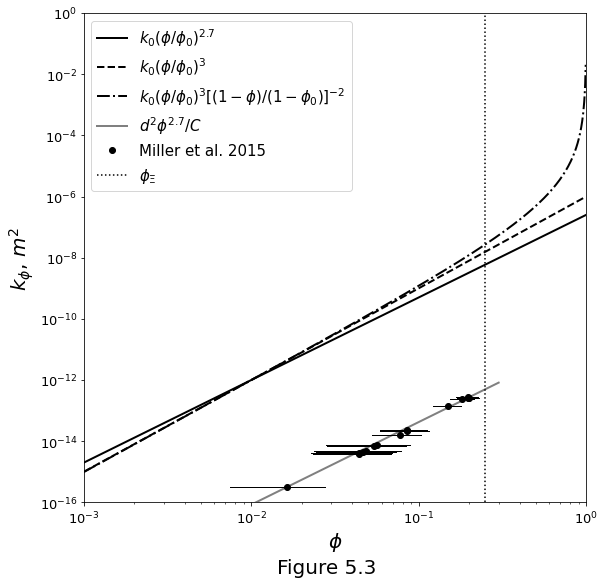

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)
fig.set_facecolor('w')

ax.loglog(phi, K2, '-k', label=r'$k_0(\phi/\phi_0)^{2.7}$', linewidth=2)
ax.loglog(phi, K3, '--k', label=r'$k_0(\phi/\phi_0)^3$', linewidth=2)
ax.loglog(phi, Kkc, '-.k', label=r'$k_0(\phi/\phi_0)^3[(1-\phi)/(1-\phi_0)]^{-2}$', linewidth=2)

# data and data fit
ax.loglog(dmphi, dmk, '-', color=[0.5, 0.5, 0.5], linewidth=2, label=r'$d^2\phi^{2.7}/C$')

ax.loglog(data[:, 0], data[:, -1], 'ok', label=r'Miller et al. 2015')
for d in data:
    ax.plot([d[0]+d[1], d[0]+d[2]], [d[3], d[3]], '-k', linewidth=1)

ax.plot([phid, phid], [1e-16, 1.0], ':k', label=r'$\phi_\Xi$')

ax.set_xlim(1e-3, 1.0)
ax.set_ylim(1e-16, 1.0)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xlabel(r'$\phi$', fontsize=20)
ax.set_ylabel(r'$k_\phi$, $m^2$', fontsize=20)
ax.legend(loc='upper left', fontsize=15)

fig.supxlabel("Figure 5.3", fontsize=20)

plt.show()